In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import string
import re 
import nltk
nltk.download('wordnet')
data=pd.read_csv('../input/Womens Clothing E-Commerce Reviews.csv')


[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [18]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Text(0.5, 1.0, 'Missing values per Feature')

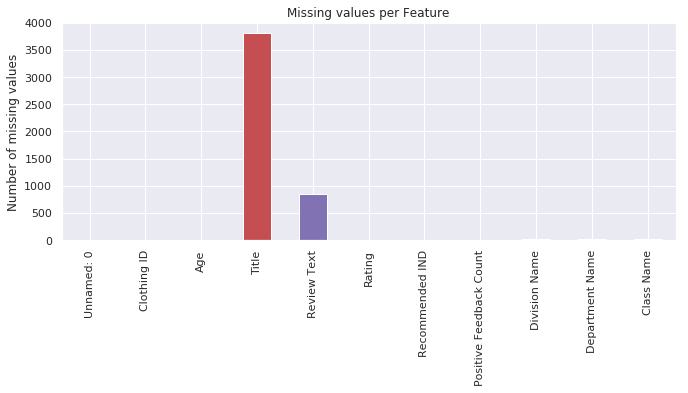

In [19]:
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(data).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing values per Feature')

Text(0.5, 1.0, 'Distribution of Recommended IND')

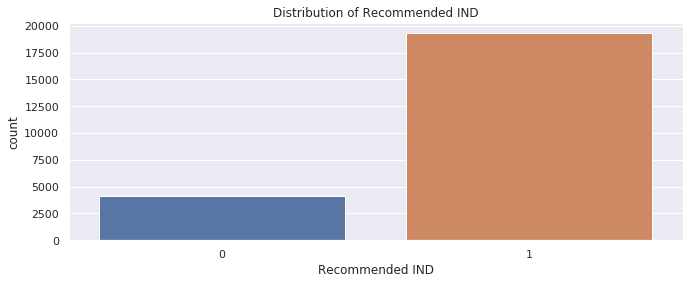

In [20]:
sns.countplot(x='Recommended IND',data=data)
plt.title("Distribution of Recommended IND")

In [21]:
data=data.dropna(subset=["Review Text"]).reset_index(drop=True)

In [22]:
def clean_and_tokenize(review):
    text = review.lower()
    
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    
    stemmer = nltk.stem.WordNetLemmatizer()
    text = " ".join(stemmer.lemmatize(token) for token in tokens)
    text = re.sub("[^a-z']"," ", text)
    return text
data["Clean_Review"] = data["Review Text"].apply(clean_and_tokenize)

In [23]:
print(data)

       Unnamed: 0                        ...                                                               Clean_Review
0               0                        ...                          absolutely wonderful   silky and sexy and comf...
1               1                        ...                          love this dress   it 's sooo pretty  i happene...
2               2                        ...                          i had such high hope for this dress and really...
3               3                        ...                          i love   love   love this jumpsuit  it 's fun ...
4               4                        ...                          this shirt is very flattering to all due to th...
5               5                        ...                          i love tracy reese dress   but this one is not...
6               6                        ...                          i aded this in my basket at hte last mintue to...
7               7                       

In [24]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Clean_Review'],
      dtype='object')

In [25]:
print(data["Clean_Review"])

0        absolutely wonderful   silky and sexy and comf...
1        love this dress   it 's sooo pretty  i happene...
2        i had such high hope for this dress and really...
3        i love   love   love this jumpsuit  it 's fun ...
4        this shirt is very flattering to all due to th...
5        i love tracy reese dress   but this one is not...
6        i aded this in my basket at hte last mintue to...
7        i ordered this in carbon for store pick up   a...
8        i love this dress  i usually get an x but it r...
9        i 'm   ''   ' and     lbs  i ordered the s pet...
10       dress run small esp where the zipper area runs...
11       this dress is perfection   so pretty and flatt...
12       more and more i find myself reliant on the rev...
13       bought the black x to go under the larkspur mi...
14       this is a nice choice for holiday gatherings  ...
15       i took these out of the package and wanted the...
16       material and color is nice  the leg opening is.

In [26]:
x = data['Clean_Review']
y = data['Recommended IND']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=0)

In [29]:
cv = CountVectorizer()

In [30]:
x_train_dtm=cv.fit_transform(x_train)
x_test_dtm=cv.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()
lr.fit(x_train_dtm,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
lr_pred = lr.predict(x_test_dtm)


In [34]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,lr_pred)
cm

array([[ 1920,  1363],
       [  861, 13969]])

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,lr_pred))


              precision    recall  f1-score   support

           0       0.69      0.58      0.63      3283
           1       0.91      0.94      0.93     14830

   micro avg       0.88      0.88      0.88     18113
   macro avg       0.80      0.76      0.78     18113
weighted avg       0.87      0.88      0.87     18113



In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lr_pred)

0.8772152597581847

In [38]:
print(x_train_dtm)

  (0, 9)	1
  (0, 192)	4
  (0, 268)	2
  (0, 347)	1
  (0, 595)	1
  (0, 768)	4
  (0, 790)	1
  (0, 1054)	2
  (0, 1079)	1
  (0, 1242)	2
  (0, 1358)	1
  (0, 1498)	1
  (0, 1534)	1
  (0, 1750)	1
  (0, 1970)	1
  (0, 1985)	1
  (0, 2009)	1
  (0, 2239)	4
  (0, 2425)	1
  (0, 2431)	1
  (0, 2470)	2
  (0, 2474)	1
  (0, 2554)	1
  (0, 2774)	1
  (0, 2820)	2
  :	:
  (4527, 2506)	1
  (4527, 2820)	1
  (4527, 2946)	3
  (4527, 2956)	1
  (4527, 3247)	1
  (4527, 3249)	1
  (4527, 3438)	1
  (4527, 3809)	1
  (4527, 3820)	1
  (4527, 3928)	1
  (4527, 4091)	1
  (4527, 4491)	1
  (4527, 4990)	1
  (4527, 5074)	1
  (4527, 5534)	1
  (4527, 5716)	1
  (4527, 5724)	5
  (4527, 5761)	2
  (4527, 5845)	1
  (4527, 6052)	1
  (4527, 6173)	1
  (4527, 6215)	3
  (4527, 6334)	1
  (4527, 6336)	1
  (4527, 6386)	1


In [39]:
from sklearn import metrics
probs = lr.predict_proba(x_test_dtm)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

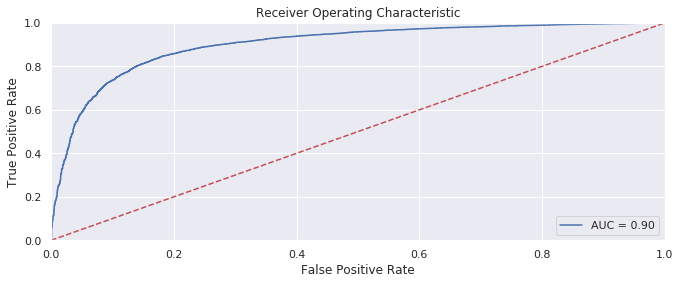

In [40]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()